In [1]:
import snap
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

Classical analysis to quantitatively describe the social networks, built using specific relationships.

Metrics to be considered for each network:
- #nodes, #edges
- average degree, indegree, outdegree
- node centrality (?, intensive)
- <b> modularity </b> (average and between finance community and the rest, to verify if it is effectively a module)
- clustering coefficient
- isConnected, connected components

NB: default script to be used as basic metrics analysis of any network

In [2]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height), rotation=45,
                ha='center', va='bottom')

## Follower Network

In [3]:
path = 'random-test/test-network-features/'
networkname = 'social_network_1_follower'
network = snap.LoadEdgeListNet(path+networkname+'.csv', '\t')

In [4]:
print '|V| = {}'.format(network.GetNodes())
print '|E| = {}'.format(network.GetEdges())
print 'Connected Network: {}'.format(snap.IsConnected(network))

|V| = 3814261
|E| = 4096963
Connected Network: False


In [5]:
# a WEAKLY connected component is a subgraph where each node is reachable by an UNDIRECTED PATH, starting from each other
# node in the component (undirected cycle present)
# the property is verified treating the graph as undirected (even if it is directed)
ComponentDist = snap.TIntPrV()
snap.GetWccSzCnt(network, ComponentDist)
print "Weakly Connected Component Distribution"
for comp in ComponentDist:
    print "#nodes in component: %d - #components: %d" % (comp.GetVal1(), comp.GetVal2())

Weakly Connected Component Distribution
#nodes in component: 2 - #components: 3
#nodes in component: 3 - #components: 6
#nodes in component: 4 - #components: 3
#nodes in component: 5 - #components: 5
#nodes in component: 6 - #components: 2
#nodes in component: 7 - #components: 1
#nodes in component: 8 - #components: 1
#nodes in component: 9 - #components: 1
#nodes in component: 10 - #components: 4
#nodes in component: 12 - #components: 1
#nodes in component: 13 - #components: 1
#nodes in component: 14 - #components: 1
#nodes in component: 16 - #components: 1
#nodes in component: 21 - #components: 1
#nodes in component: 22 - #components: 1
#nodes in component: 25 - #components: 1
#nodes in component: 26 - #components: 1
#nodes in component: 27 - #components: 1
#nodes in component: 36 - #components: 1
#nodes in component: 48 - #components: 1
#nodes in component: 67 - #components: 1
#nodes in component: 194 - #components: 1
#nodes in component: 3813603 - #components: 1


In [6]:
# a STRONGLY connected component is a subgraph where each node is reachable by a DIRECTED PATH, starting from each other
# node in the component (directed cycle present)
ComponentDist = snap.TIntPrV()
snap.GetSccSzCnt(network, ComponentDist)
print "Strongly Connected Component Distribution"
for comp in ComponentDist:
    print "#nodes in component: %d - #components: %d" % (comp.GetVal1(), comp.GetVal2())

Strongly Connected Component Distribution
#nodes in component: 1 - #components: 3814246
#nodes in component: 2 - #components: 3
#nodes in component: 9 - #components: 1


In [7]:
indeg = []
count = []
indeg_distribution = snap.TIntPrV()
snap.GetInDegCnt(network, indeg_distribution)
for item in indeg_distribution:
    indeg.append(item.GetVal1())
    count.append(item.GetVal2())

In [8]:
# indegree represents the number of incoming follower relationships for each node: most of them have 0 as out-degree, 
# meaning that they are the follower of 1 single user (leaves), other are shared across multiple users
# indegree is extremely variated, as most users have a different number of followers
print 'In-degrees: {}'.format(indeg)
print 'Frequency {}'.format(count)

In-degrees: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 20, 21, 22, 23, 24, 25, 26, 31, 34, 35, 42, 47, 54, 59, 66, 70, 75, 77, 78, 79, 80, 81, 89, 94, 96, 104, 111, 113, 126, 127, 129, 147, 153, 154, 155, 160, 164, 165, 184, 193, 202, 213, 214, 217, 243, 259, 266, 270, 283, 289, 303, 307, 349, 356, 364, 374, 392, 397, 403, 418, 437, 456, 462, 492, 509, 574, 587, 630, 650, 739, 819, 919, 963, 965, 978, 987, 1123, 1154, 1173, 1294, 1493, 1592, 1944, 2203, 2215, 2276, 2449, 2465, 2486, 2531, 2667, 4255, 6131, 6203, 6548, 7337, 11204, 11917, 11994, 12481, 15295, 15514, 17449, 18022, 20652, 20665, 24171, 32857, 77685, 210955, 709799, 2805593]
Frequency [3814112, 3, 6, 2, 5, 2, 3, 1, 1, 5, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [9]:
# outdegree represents the number of shared followers: if the outdegree is >1, then it means that the user is follower
# of more than 1 seed/random test user
# outdegree == 0 are the target users which do not appear in any other list

outdeg = []
count = []
outdeg_distribution = snap.TIntPrV()
snap.GetOutDegCnt(network, outdeg_distribution)
for item in outdeg_distribution:
    outdeg.append(item.GetVal1())
    count.append(item.GetVal2())

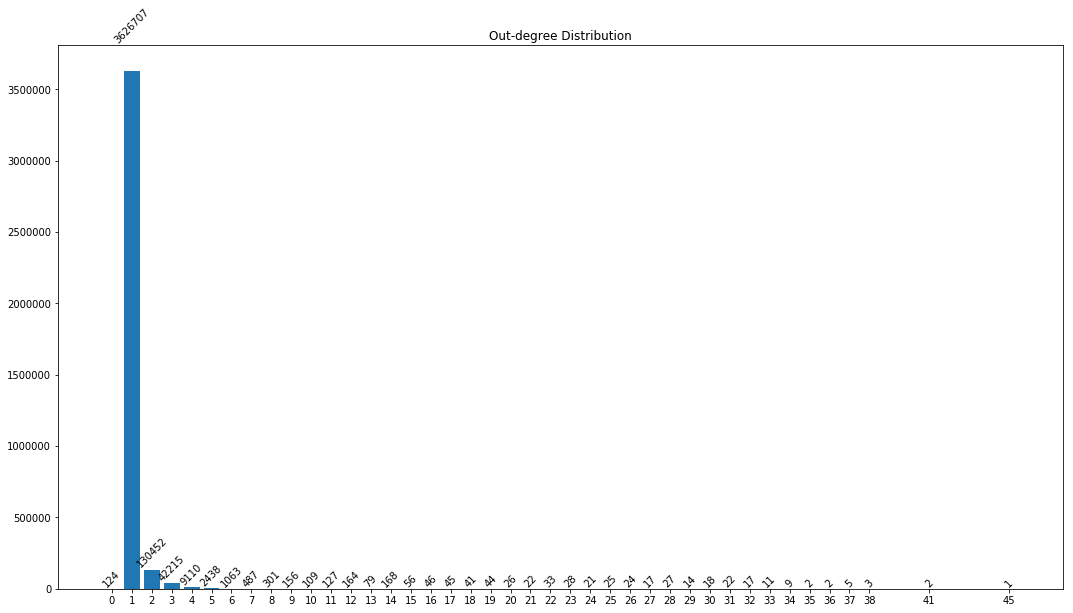

In [10]:
plt.figure(figsize=(18,10))
bars = plt.bar(outdeg, count)
plt.title('Out-degree Distribution')
plt.xticks(outdeg)
autolabel(bars)

In [11]:
# clustering coefficient is a measure of the tendency of the graph to create tight connections
# a triplet is three nodes that are connected by either two (open triplet) or three (closed triplet) undirected ties
# the clustering coefficient is the ratio between the closed triplets and all the triplets

#print 'Clustering Coefficient: %f' % snap.GetClustCf (network, int(network.GetNodes()*0.6))

In [12]:
# test the modularity of the community of seeds and its followings
seeds = map(str, list(pd.read_csv('../data-seed/fashion/user.csv', sep='\t')['id_user']))

community_ids = snap.TIntV()
for node in network.Nodes():
    nid = node.GetId()
    id_user = network.GetStrAttrDatN(nid, 'id')
    
    if id_user in seeds:
        community_ids.Add(nid)
        print nid, id_user
        nodeIt = network.GetNI(nid)
        for e in range(nodeIt.GetInDeg()):
            community_ids.Add(nodeIt.GetInNId(e))
community_ids.Merge()

1 47807745
216 225029801
2666 525277114
4087 459326572
4156 536190247
5249 244143740
5385 325408922
5482 1200492710
5851 111332587
6311 36913223
7402 927243296
7859 579993153
8196 556136737
8292 1217757193
8363 462738676
8411 1395095622
8725 544969648
8744 3012232089


In [13]:
print "Nodes in the finance following subnetwork: %d" % community_ids.Len()
print "Percentage of the community with respect to the overall graph: {}".format(float(community_ids.Len())/network.GetNodes())

Nodes in the finance following subnetwork: 8754
Percentage of the community with respect to the overall graph: 0.00229507105046


In [19]:
# need to redefine the network as an undirected graphs
modularity = snap.GetModularity(snap.GetUnDir(network), community_ids)

In [20]:
print 'Modularity of fashion community: {}'.format(modularity)
#print 'Modularity of entire graph: {}'.format(modularity_graph)

Modularity of fashion community: 0.00117464024269
